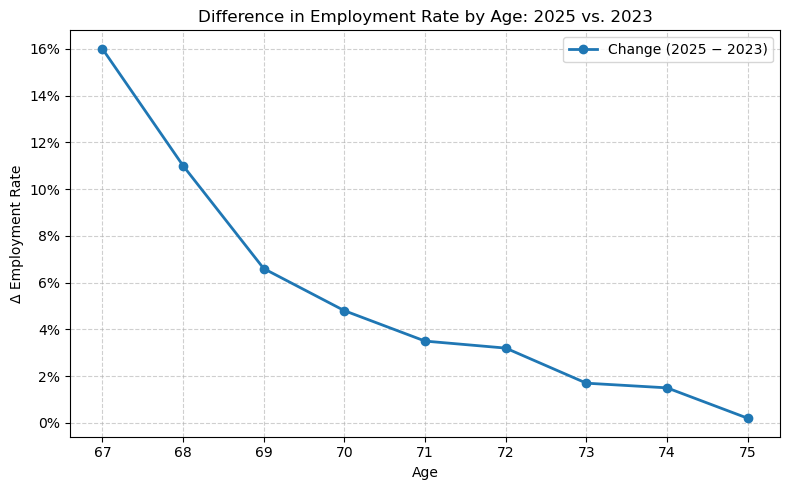

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os

# --- Configuration ---
repo_path   = os.path.abspath("..")
excel_path  = os.path.join(repo_path, "data", "jobindsats.xlsx")
output_dir  = "/Users/frederiklarsen/Library/Mobile Documents/com~apple~CloudDocs/KU/Speciale/Figurer/counterfactuals/verify"

# 1) Load data from Excel
df = pd.read_excel(excel_path)

# 2) Convert comma‐decimal to dot and cast to float
df["employment_rate"] = (
    df["employment_rate"]
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)

# 3) Clean up age labels: map '75+' → 75, then to int
df["age_numeric"] = df["age"].replace({"75+": "75"}).astype(int)

# 4) Pivot so years become columns, indexed by the numeric age
df_pivot = df.pivot(index="age_numeric", columns="year", values="employment_rate")

# 5) Compute the difference 2025 − 2023
df_pivot["diff_2025_2023"] = df_pivot[2025] - df_pivot[2023]

# 6) Plot the difference as a line
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(
    df_pivot.index,
    df_pivot["diff_2025_2023"],
    marker="o",
    linewidth=2,
    label="Change (2025 − 2023)"
)

ax.set_xlabel("Age")
ax.set_ylabel("Δ Employment Rate")
ax.set_title("Difference in Employment Rate by Age: 2025 vs. 2023")
ax.grid(axis="both", linestyle="--", alpha=0.6)

# 7) Format y‐axis in percentage points
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

ax.legend(loc="best")
plt.tight_layout()

# 8) Save the figure
os.makedirs(output_dir, exist_ok=True)
plt.savefig(output_dir, dpi=150, bbox_inches="tight")

plt.show()